<a href="https://colab.research.google.com/github/Ajay-2007/deep-learning-projects/blob/master/7.cnn_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torchvision import models
from torchvision import transforms, utils
import numpy as np
import scipy.misc
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import json


In [0]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225])
])

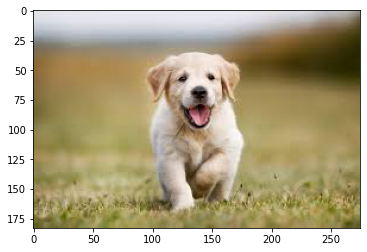

In [7]:
image = Image.open('dog.jpg')
plt.imshow(image)

In [8]:
vgg = models.vgg16(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/checkpoints/vgg16-397923af.pth


In [0]:
CUDA = torch.cuda.is_available()
if CUDA:
    vgg = vgg.cuda()

In [10]:
vgg.classifier[-1] 

Linear(in_features=4096, out_features=1000, bias=True)

In [0]:
# Apply the transforms on the image
image = transform(image)

In [12]:
print(image.shape)

torch.Size([3, 224, 224])


In [0]:

# Add the batch size
image = image.unsqueeze(0)

In [0]:
# Wrap it up in a variable
image = Variable(image)


In [0]:
if CUDA:
    image = image.cuda()

In [16]:
print(image.shape)

torch.Size([1, 3, 224, 224])


In [0]:
output = vgg.forward(image)

In [18]:
print(output.shape)

torch.Size([1, 1000])


In [0]:
# Transfer the 2D Tensor to 1D Tensor
output = output.squeeze(0)

In [20]:

print(output.shape)


torch.Size([1000])


In [0]:

labels = json.load(open('imagenet_class_index.json'))

In [0]:
index = output.max(0)

In [24]:
print(index)
# print(tuple(index))
# index = tuple(index)

torch.return_types.max(
values=tensor(18.9630, device='cuda:0', grad_fn=<MaxBackward0>),
indices=tensor(207, device='cuda:0'))


In [25]:
print(index[1])

tensor(207, device='cuda:0')


In [0]:
index = str(index[1].item())
label = labels[index][1]

In [28]:
print(label) 

golden_retriever


In [29]:
vgg

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [0]:
module_list = list(vgg.features.modules())

In [31]:
module_list

[Sequential(
   (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (1): ReLU(inplace=True)
   (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (3): ReLU(inplace=True)
   (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (6): ReLU(inplace=True)
   (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (8): ReLU(inplace=True)
   (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (11): ReLU(inplace=True)
   (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (13): ReLU(inplace=True)
   (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (15): ReLU(inplace=True)
   (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   (17): Conv2d(

In [32]:
vgg.features

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

In [33]:
print(vgg.features)
print(module_list[0])
print(module_list[1])
print(module_list[2])

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

In [0]:
outputs = []
names = []

for layer in module_list[1:]:
  image = layer(image)
  outputs.append(image)
  names.append(str(layer))

In [35]:
names

['Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))',
 'ReLU(inplace=True)',
 'Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))',
 'ReLU(inplace=True)',
 'MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)',
 'Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))',
 'ReLU(inplace=True)',
 'Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))',
 'ReLU(inplace=True)',
 'MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)',
 'Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))',
 'ReLU(inplace=True)',
 'Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))',
 'ReLU(inplace=True)',
 'Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))',
 'ReLU(inplace=True)',
 'MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)',
 'Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))',
 'ReLU(inplace=True)',
 'Conv2d(

In [36]:
for feature_map in outputs:
  print(feature_map.shape)

torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 7, 7])


In [0]:
processed = []

for feature_map in outputs:
  feature_map = feature_map.squeeze(0)
  # Convert the 3D Tensor to 2D. Sum the element of every channel
  gray_scale = torch.sum(feature_map, 0)
  # Normalize the corresponding feature map
  gray_scale = gray_scale / feature_map.shape[0]
  processed.append(gray_scale.data.cpu().numpy())

In [39]:
names[0].split('(')

['Conv2d',
 '3, 64, kernel_size=',
 '3, 3), stride=',
 '1, 1), padding=',
 '1, 1))']

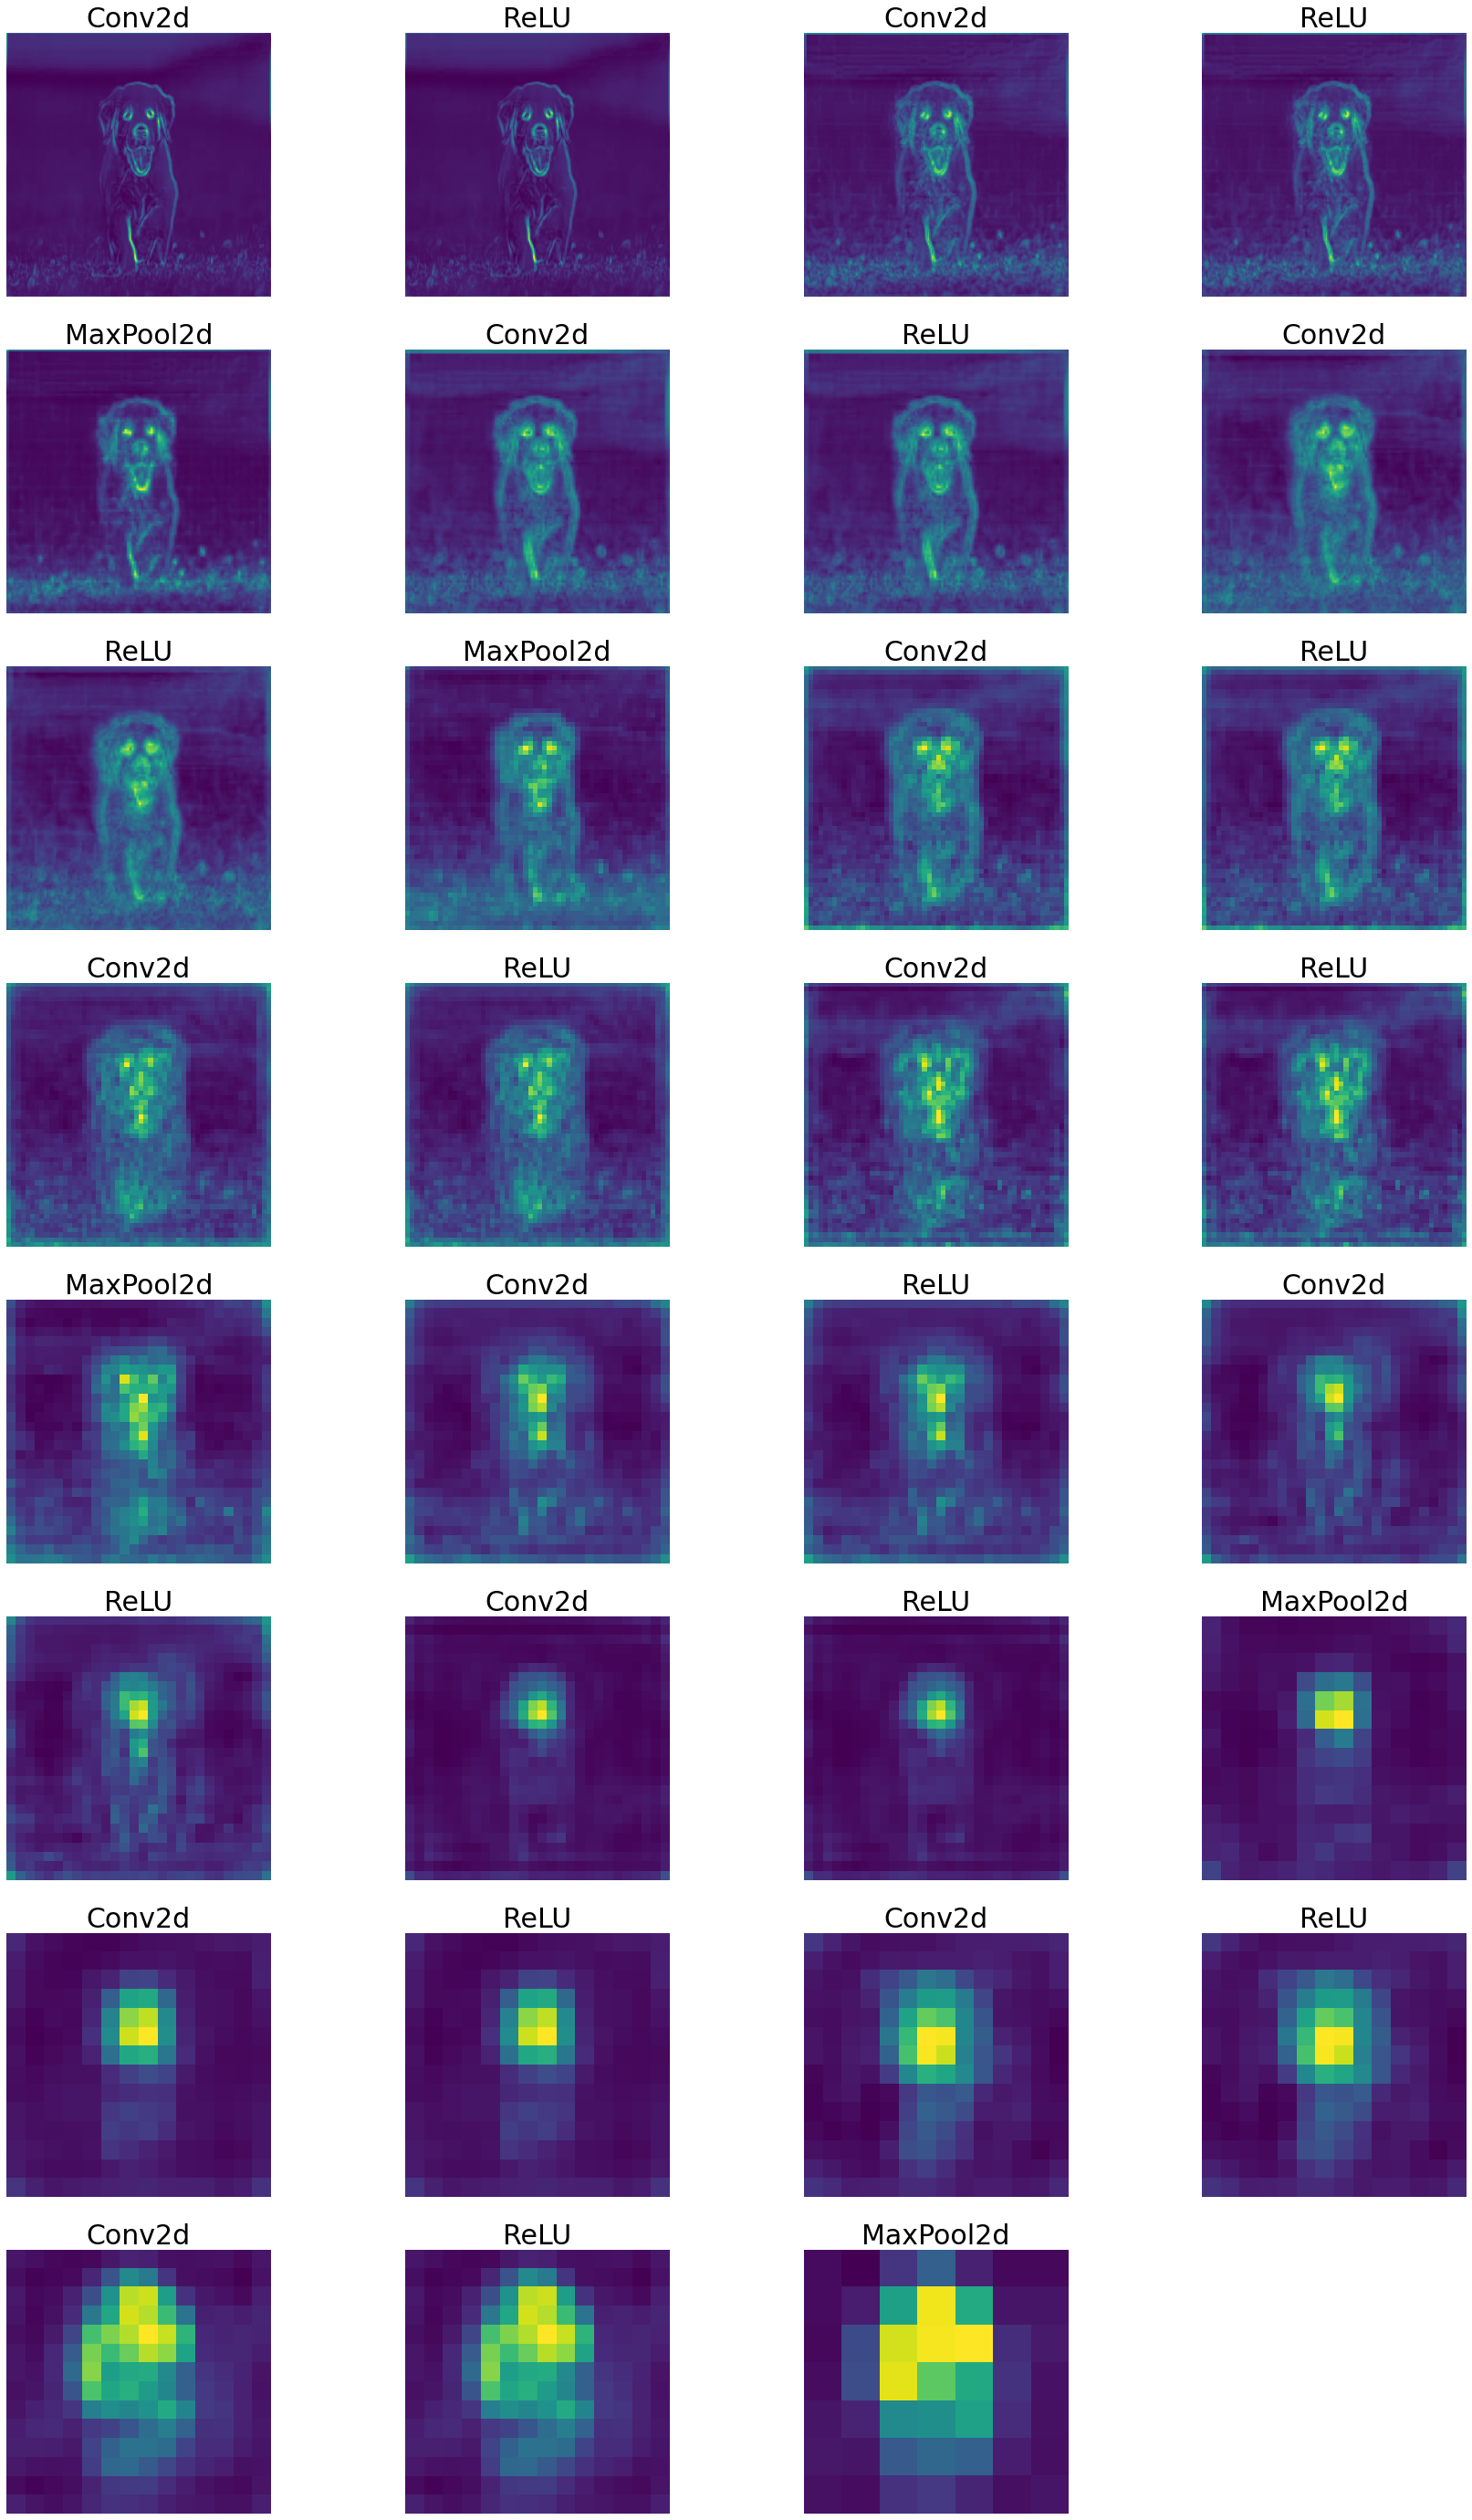

In [41]:
fig = plt.figure(figsize = (30, 50))

for i in range(len(processed)):
  a = fig.add_subplot(8, 4, i+1)
  imgplot = plt.imshow(processed[i])
  plt.axis('off')
  a.set_title(names[i].split('(')[0], fontsize=30)

plt.savefig('feature_maps.jpg', bbox_inches='tight')